In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# LxL 크기의 랜덤한 스핀 행렬을 생성하는 함수
def S(L):
    return np.random.choice([-1, 1], size=(L, L))

# 초기화 함수: prob 배열에 exp(-4*beta)와 exp(-8*beta) 값을 계산하여 저장
def initialize(beta):
    global prob
    prob = np.zeros(5)
    for i in range(2, 5, 2):
        prob[i] = np.exp(-2 * beta * i)

# 랜덤하게 하나의 스핀을 뒤집는 함수
def single_spin_flip(matrix):
    global N, L
    i, j = np.random.randint(L), np.random.randint(L)  # 랜덤한 위치 선택
    new_matrix = matrix.copy()
    new_matrix[i, j] *= -1  # 선택된 위치의 스핀을 뒤집음
    return new_matrix

# 스핀 행렬의 전체 에너지를 계산하는 함수
def energy(spin_matrix):
    global N, L
    total_energy = 0
    for i in range(L):
        for j in range(L):
            total_energy -= spin_matrix[i, j] * (spin_matrix[(i + 1) % L, j] + spin_matrix[i, (j + 1) % L])
    return total_energy

# 두 상태 사이의 전이를 수락할지 여부를 결정하는 함수
def accept(E1, E2):
    if E2 < E1 or np.random.rand() < np.exp(beta * (E1 - E2)):
        return 1
    else:
        return 0

# 스핀 행렬의 평균 자화를 계산하는 함수
def m(matrix):
    return np.abs(np.sum(matrix)) / N

# 메트로폴리스 알고리즘을 사용하여 m_list와 E_list를 생성하는 함수
def make_list(beta):
    m_list = []
    E_list = []
    SL = S(L)  # 초기 스핀 행렬 생성
    n = 10000  # 반복 횟수
    for _ in range(n):
        flip_SL = single_spin_flip(SL)  # 랜덤 스핀 뒤집기
        E_mu = energy(SL)  # 현재 스핀 행렬의 에너지 계산
        E_nu = energy(flip_SL)  # 뒤집힌 스핀 행렬의 에너지 계산
        if accept(E_mu, E_nu) == 1:  # 메트로폴리스 알고리즘으로 허락된 경우 스핀 행렬 업데이트
            SL = flip_SL
        m_list.append(m(SL))  # 현재 스핀 행렬의 평균 자화 리스트에 추가
        E_list.append(E_mu)  # 현재 스핀 행렬의 에너지 리스트에 추가
    return m_list, E_list

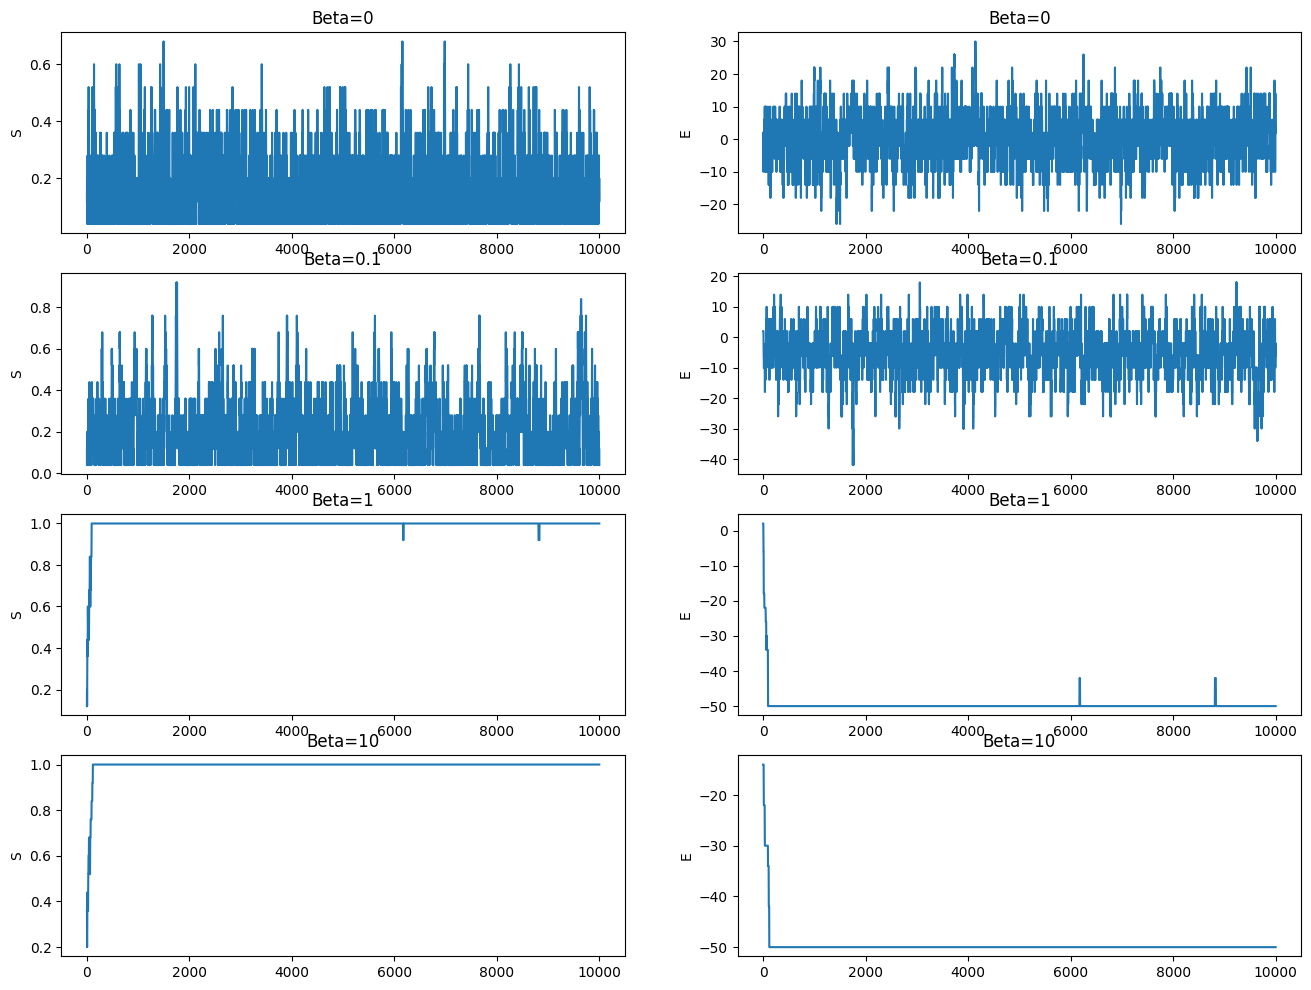

In [ ]:
L = 5
N = L*L
beta_values = [0, 0.1, 1, 10]

plt.figure(figsize=(16, 12))

for i, beta in enumerate(beta_values):
    m_list, E_list = make_list(beta)

    plt.subplot(4, 2, 2*i+1)
    plt.plot(m_list)
    plt.title(f'Beta={beta}')
    plt.ylabel('S')

    plt.subplot(4, 2, 2*i+2)
    plt.plot(E_list)
    plt.title(f'Beta={beta}')
    plt.ylabel('E')

plt.show()

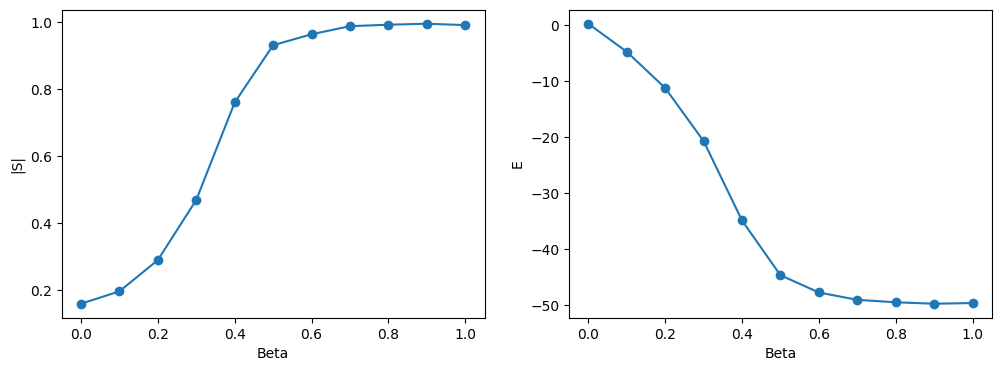

In [ ]:
L = 5
N = L*L
beta_values = np.linspace(0, 1, 11)

results_E = np.zeros(len(beta_values))
results_S_avg = np.zeros(len(beta_values))

for i, beta in enumerate(beta_values):
  initialize(beta)
  m_list, E_list = make_list(beta)
  results_E[i] = np.mean(E_list)
  results_S_avg[i] = np.mean(m_list)

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(beta_values, results_S_avg, marker='o')
plt.xlabel('Beta')
plt.ylabel('|S|')

plt.subplot(1, 2, 2)
plt.plot(beta_values, results_E, marker='o')
plt.xlabel('Beta')
plt.ylabel('E')

plt.show()